In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

#import data
homeprices = pd.read_csv('trainprices.csv')

# Prepare the Data
Conduct EDA and provide appropriate visualizations in the process.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

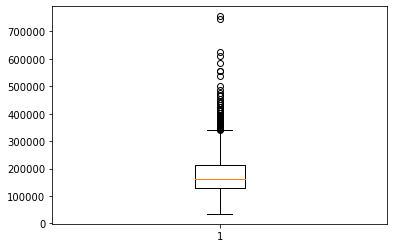

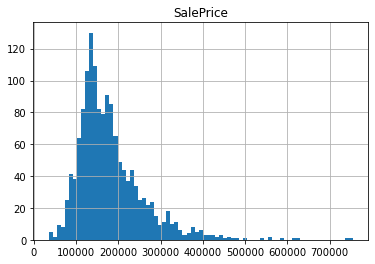

In [2]:
#descriptive statistics and shape of dependent variable
print(homeprices['SalePrice'].describe())
plt.boxplot(homeprices['SalePrice'])
homeprices.hist(column='SalePrice', bins=75)

In [3]:
#check for duplicate values
hp1 = homeprices.drop_duplicates(keep='first')
print('Number of Records before duplicate drop:', len(homeprices))
print('Number of Records after duplicate drop:', len(hp1))
#check for missing values
hp2 = homeprices.dropna()
print('Number of Records before null value drop:', len(homeprices))
print('Number of Records after null value drop:', len(hp2))
#Identify columns with missing data
homeprices.info()

Number of Records before duplicate drop: 1460
Number of Records after duplicate drop: 1460
Number of Records before null value drop: 1460
Number of Records after null value drop: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Con

In [4]:
#Resolve missing values:

#Columns where missing values should be 'None' or 'No X' category
homeprices['Alley'] = homeprices['Alley'].fillna('None')
homeprices['MasVnrType'] = homeprices['MasVnrType'].fillna('None')
homeprices['BsmtQual'] = homeprices['BsmtQual'].fillna('None')
homeprices['BsmtCond'] = homeprices['BsmtCond'].fillna('None')
homeprices['BsmtExposure'] = homeprices['BsmtExposure'].fillna('None')
homeprices['BsmtFinType1'] = homeprices['BsmtFinType1'].fillna('None')
homeprices['BsmtFinType2'] = homeprices['BsmtFinType2'].fillna('None')
homeprices['FireplaceQu'] = homeprices['FireplaceQu'].fillna('None')
homeprices['GarageType'] = homeprices['GarageType'].fillna('None')
homeprices['GarageFinish'] = homeprices['GarageFinish'].fillna('None')
homeprices['GarageQual'] = homeprices['GarageQual'].fillna('None')
homeprices['GarageCond'] = homeprices['GarageCond'].fillna('None')
homeprices['PoolQC'] = homeprices['PoolQC'].fillna('None')
homeprices['Fence'] = homeprices['Fence'].fillna('None')
homeprices['MiscFeature'] = homeprices['MiscFeature'].fillna('None')

#Columns where missing values should be 0
homeprices['MasVnrArea'] = homeprices['MasVnrArea'].fillna(0)

#Columns where we will replaces the missing value with the median
homeprices['LotFrontage'] = homeprices['LotFrontage'].fillna(homeprices['LotFrontage'].median())
homeprices['GarageYrBlt'] = homeprices['GarageYrBlt'].fillna(homeprices['GarageYrBlt'].median())

#Columns where we will replaces the missing value with the mode
electricalmode = homeprices['Electrical'].mode()
homeprices['Electrical'] = homeprices['Electrical'].fillna(electricalmode[0])

In [5]:
homeprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# examine outliers
#count outliers by variable
Q1 = homeprices.quantile(0.25)
Q3 = homeprices.quantile(0.75)
IQR = Q3 - Q1
outlier_count = pd.DataFrame(((homeprices < (Q1 - 1.5 * IQR)) | (homeprices > (Q3 + 1.5 * IQR))).sum())
outlier_count = outlier_count.sort_values(by=0, ascending=False)
outlier_count = outlier_count[outlier_count[0] > 0]
pd.DataFrame.transpose(outlier_count)

,EnclosedPorch,BsmtFinSF2,OverallCond,ScreenPorch,LotFrontage,MSSubClass,MasVnrArea,BsmtHalfBath,OpenPorchSF,LotArea,...,1stFlrSF,PoolArea,YearBuilt,BsmtFinSF1,Fireplaces,GarageCars,OverallQual,2ndFlrSF,BsmtFullBath,GarageYrBlt
0,208,167,125,116,106,103,98,82,77,69,...,20,7,7,7,5,5,2,2,1,1


In [7]:
homeprices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


After investigating the variables with outliers, variable extreme values (min and max) seem reasonable given the information and context. There outliers did not identify any obvious miscoding of data. Many of the variables with flagged outliers are heavily right skewed by just a few data points because most observations have a zero value for that variable (e.g. Enclosed Porch Square Footage).

In [8]:
# Create a TotalBaths variable to reduce the dimensionality of the data.
# The correlation table shows the new variable is more correlated with SalePrice than any of the individual bathroom variables

homeprices['TotalBaths'] = homeprices['BsmtFullBath'] + .5 * homeprices['BsmtHalfBath'] + homeprices['FullBath'] + .5 * homeprices['HalfBath']
bathcorr = homeprices.loc[:, ['TotalBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']].corr()
bathcorr.style.background_gradient(cmap='coolwarm').set_precision(3)

,TotalBaths,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
TotalBaths,1.000,0.583,0.012,0.694,0.394,0.632
BsmtFullBath,0.583,1.000,-0.148,-0.065,-0.031,0.227
BsmtHalfBath,0.012,-0.148,1.000,-0.055,-0.012,-0.017
FullBath,0.694,-0.065,-0.055,1.000,0.136,0.561
HalfBath,0.394,-0.031,-0.012,0.136,1.000,0.284
SalePrice,0.632,0.227,-0.017,0.561,0.284,1.000


In [9]:
#Explore Correlations between independent variables and the dependent variables
corr = homeprices.corr()
corr = corr[['SalePrice']]
corr = corr.sort_values(by='SalePrice', ascending=True)
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,SalePrice
KitchenAbvGr,-0.136
EnclosedPorch,-0.129
MSSubClass,-0.084
OverallCond,-0.078
YrSold,-0.029
LowQualFinSF,-0.026
Id,-0.022
MiscVal,-0.021
BsmtHalfBath,-0.017
BsmtFinSF2,-0.011


In [10]:
from dython.nominal import associations

cat_var = homeprices.select_dtypes(include=['object']).columns.tolist()
num_var = homeprices.select_dtypes(exclude=['object']).columns.tolist()
homeprices_cat = homeprices[cat_var]
homeprices_cat = homeprices_cat.join(homeprices['SalePrice'])
#associations(homeprices_cat)

The most highly-correlated continuous features with SalePrice are:
OverallQual, GrLivArea, GarageCars, TotalBaths, GarageArea, TotalBsmtSF, 1stFlrSF,  TotRmsAbvGrd, YrBuilt, YearRemodAdd

The most highly-correlated categorical features with SalePrice are:
Neighborhood (.738630), GarageFinish (.553059), FireplaceQu (.542181), BsmtQual(.681905), ExterQual (.690933), KitchenQual (.675721)

Thus, we can reduce the dimensionality of the model by keeping only those features that are highly correlated with SalePrice:

OverallQual, GrLivArea, GarageCars, TotalBaths, TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd, YrBuilt, YearRemodAdd, Neighborhood, BsmtQual, ExterQual, KitchenQual, GarageFinish, FireplaceQu

GarageArea will be highly co-linear with Garage Cars, so we will not include it in the model.

In [11]:
#Create Reduced Dimensionality Dataset
homeprices_red = homeprices[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBaths', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu']]

In [12]:
hpcorr = homeprices_red.corr()
hpcorr.style.background_gradient(cmap='coolwarm').set_precision(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBaths,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000,0.791,0.709,0.640,0.632,0.614,0.606,0.534,0.523,0.507
OverallQual,0.791,1.000,0.593,0.601,0.541,0.538,0.476,0.427,0.572,0.551
GrLivArea,0.709,0.593,1.000,0.467,0.595,0.455,0.566,0.825,0.199,0.287
GarageCars,0.640,0.601,0.467,1.000,0.484,0.435,0.439,0.362,0.538,0.421
TotalBaths,0.632,0.541,0.595,0.484,1.000,0.414,0.391,0.460,0.524,0.444
TotalBsmtSF,0.614,0.538,0.455,0.435,0.414,1.000,0.820,0.286,0.391,0.291
1stFlrSF,0.606,0.476,0.566,0.439,0.391,0.820,1.000,0.410,0.282,0.240
TotRmsAbvGrd,0.534,0.427,0.825,0.362,0.460,0.286,0.410,1.000,0.096,0.192
YearBuilt,0.523,0.572,0.199,0.538,0.524,0.391,0.282,0.096,1.000,0.593
YearRemodAdd,0.507,0.551,0.287,0.421,0.444,0.291,0.240,0.192,0.593,1.000


In [13]:
#Rooms Above Grade is highly colinear with GrLivArea
#1stFlrSF is highly colinear with TotalBsmtSF
#Drop colinear features
homeprices1 = homeprices_red.drop(['TotalBsmtSF','TotRmsAbvGrd'], axis=1)

In [14]:
homeprices_x = homeprices1.drop(columns = ['SalePrice'])
cat_var = homeprices_x.select_dtypes(include=['object']).columns.tolist()
num_var = homeprices_x.select_dtypes(exclude=['object']).columns.tolist()

In [15]:
#Transform categorical data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_var),
        ("cat", OneHotEncoder(), cat_var)
    ])

housing_prepared = full_pipeline.fit_transform(homeprices_x.astype(str))

#send to a dense matrix
#df1 = housing_prepared.toarray()

# Create the Models

In [16]:
#Run Linear Regression Model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, homeprices['SalePrice'])
r_sq = lin_reg.score(housing_prepared, homeprices['SalePrice'])
print('Linear Correlation Coefficent:', r_sq)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(homeprices['SalePrice'], housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Linear Root Mean Square Error:', lin_rmse)

Linear Correlation Coefficent: 0.8451447718525468
Linear Root Mean Square Error: 31251.226940106197


In [17]:
#Run Polynomial Regression Model

#from sklearn.preprocessing import PolynomialFeatures
#poly_features = PolynomialFeatures(degree=2, include_bias=False)
#housing_prepared_poly = poly_features.fit_transform(housing_prepared)

#poly_reg = LinearRegression()
#poly_reg.fit(housing_prepared_poly, homeprices['SalePrice'])

#r_sq = poly_reg.score(housing_prepared_poly, homeprices['SalePrice'])
#print('Polynomial Regression Correlation Coefficent:', r_sq)

#poly_housing_predictions = poly_reg.predict(housing_prepared_poly)
#poly_mse = mean_squared_error(homeprices['SalePrice'], poly_housing_predictions)
#poly_rmse = np.sqrt(poly_mse)
#print('Polynomial Regression Root Mean Square Error:', poly_rmse)

In [18]:
#Cross Validation

from sklearn.model_selection import cross_val_score

def display_scores(scores):
     print("Cross Validation Scores:", scores)
     print("Cross Validation Mean:", scores.mean())
     print("Cross Validation Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, housing_prepared, homeprices['SalePrice'], scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Cross Validation Scores: [25346.44504089 28850.82601766 26417.33685745 40668.0154278
 38128.52956097 29871.49269987 28026.25336226 26890.94766414
 49201.73792587 28438.02556961]
Cross Validation Mean: 32183.961012652446
Cross Validation Standard deviation: 7434.508985629517


In [19]:
#poly_scores = cross_val_score(lin_reg, housing_prepared_poly, homeprices['SalePrice'], scoring="neg_mean_squared_error", cv=10)
#poly_rmse_scores = np.sqrt(-poly_scores)
#display_scores(poly_rmse_scores)

Based on the cross-validation of the linear mean squared error of the two models, we will use the linear regression.

# Evaluate Model Assumptions

In [20]:
#Calculate Residuals
lin_reg.fit(housing_prepared, homeprices['SalePrice'])
prediction = lin_reg.predict(housing_prepared)
dfr = pd.DataFrame(prediction)
dfr.columns =['prediction']
dfr['residuals'] = (homeprices['SalePrice'] - prediction)
dfr['actual'] = homeprices['SalePrice']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


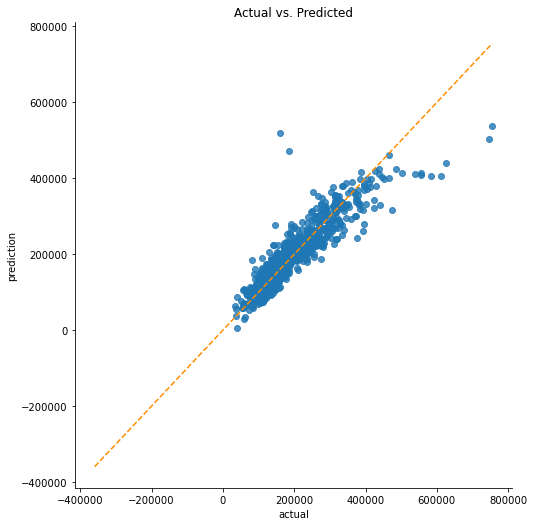

In [21]:
#Assumption 1: The true relationship is linear
sns.lmplot(x='actual', y='prediction', data=dfr, fit_reg=False, size=7)

line_coords = np.arange(dfr.min().min(), dfr.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

There is not a perfect linear relationship. Our predictions are biased towards lower values in the higher values (above 500,000).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


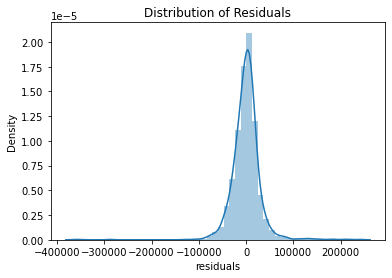

In [22]:
#Assumption 2: Errors are normally distributed
plt.title('Distribution of Residuals')
sns.distplot(dfr['residuals'])
plt.show()

The residuals do follow a normal distribution. This assumption is satisfied.

In [23]:
#Assumption 3: No multi-colinearity among features
hpcorr = homeprices1.corr()
hpcorr.style.background_gradient(cmap='coolwarm').set_precision(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBaths,1stFlrSF,YearBuilt,YearRemodAdd
SalePrice,1.000,0.791,0.709,0.640,0.632,0.606,0.523,0.507
OverallQual,0.791,1.000,0.593,0.601,0.541,0.476,0.572,0.551
GrLivArea,0.709,0.593,1.000,0.467,0.595,0.566,0.199,0.287
GarageCars,0.640,0.601,0.467,1.000,0.484,0.439,0.538,0.421
TotalBaths,0.632,0.541,0.595,0.484,1.000,0.391,0.524,0.444
1stFlrSF,0.606,0.476,0.566,0.439,0.391,1.000,0.282,0.240
YearBuilt,0.523,0.572,0.199,0.538,0.524,0.282,1.000,0.593
YearRemodAdd,0.507,0.551,0.287,0.421,0.444,0.240,0.593,1.000


The features with high colinearity were eliminated earlier.

There is some low colinearity between the remaining model features. This will not affect the accuracy of the predictions of the model, but it will make the model itself more difficult to interpret.

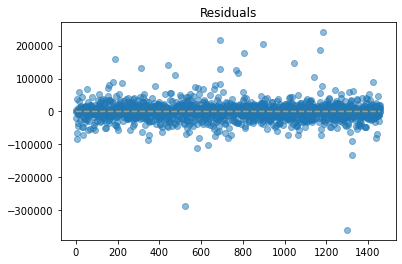

In [24]:
#Assumption 4: Homoscedasticity of errors (or, equal variance around the line).

ax = plt.subplot(111)  # To remove spines
plt.scatter(x=dfr.index, y=dfr.residuals, alpha=0.5)
plt.plot(np.repeat(0, dfr.index.max()), color='darkorange', linestyle='--')
#ax.spines['right'].set_visible(False)  # Removing the right spine
#ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

#Assumption 4: Independence of the observations

While the residuals are for the most part tightly and evenly clustered around 0, there are some extreme points. However, these extreme points seem to be distributed throughout the range of predictions meaning the variance across residuals apprears to somewhat uniform throughout the dataset.

# Run the Model on the Test Set

In [25]:
#Bring in test data

homepricestest = pd.read_csv('testprices.csv')
test = pd.DataFrame(homepricestest)

In [34]:
#Clean test data

test_red = test[['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu']]
dataclean = test_red.copy()
dataclean['OverallQual'] = dataclean['OverallQual'].fillna(dataclean['OverallQual'].median())
dataclean['GrLivArea'] = dataclean['GrLivArea'].fillna(dataclean['GrLivArea'].median())
dataclean['GarageCars'] = dataclean['GarageCars'].fillna(0)
dataclean['BsmtFullBath'] = dataclean['BsmtFullBath'].fillna(0)
dataclean['BsmtHalfBath'] = dataclean['BsmtHalfBath'].fillna(0)
dataclean['FullBath'] = dataclean['FullBath'].fillna(0)
dataclean['HalfBath'] = dataclean['HalfBath'].fillna(0)
dataclean['TotalBaths'] = dataclean['BsmtFullBath'] + .5 * dataclean['BsmtHalfBath'] + dataclean['FullBath'] + .5 * dataclean['HalfBath']
dataclean['1stFlrSF'] = dataclean['1stFlrSF'].fillna(dataclean['1stFlrSF'].median())
dataclean['YearBuilt'] = dataclean['YearBuilt'].fillna(dataclean['YearBuilt'].median())
dataclean['YearRemodAdd'] = dataclean['YearRemodAdd'].fillna(dataclean['YearRemodAdd'].median())
dataclean['Neighborhood'] = dataclean['Neighborhood'].fillna('Unknown')
dataclean['BsmtQual'] = dataclean['BsmtQual'].fillna('None')
exqualmode = dataclean['ExterQual'].mode()
dataclean['ExterQual'] = dataclean['ExterQual'].fillna(exqualmode[0])
kqualmode = dataclean['KitchenQual'].mode()
dataclean['KitchenQual'] = dataclean['KitchenQual'].fillna(kqualmode[0])
dataclean['GarageFinish'] = dataclean['GarageFinish'].fillna('None')
dataclean['FireplaceQu'] = dataclean['FireplaceQu'].fillna('None')
dataclean = dataclean.drop(columns = ['BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath'])

In [35]:
test_cat_var = dataclean.select_dtypes(include=['object']).columns.tolist()
test_num_var = dataclean.select_dtypes(exclude=['object']).columns.tolist()
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1459 non-null   float64
 3   1stFlrSF      1459 non-null   int64  
 4   YearBuilt     1459 non-null   int64  
 5   YearRemodAdd  1459 non-null   int64  
 6   Neighborhood  1459 non-null   object 
 7   BsmtQual      1459 non-null   object 
 8   ExterQual     1459 non-null   object 
 9   KitchenQual   1459 non-null   object 
 10  GarageFinish  1459 non-null   object 
 11  FireplaceQu   1459 non-null   object 
 12  TotalBaths    1459 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 148.3+ KB


In [36]:
#Transform categorical variables into binary variables


num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, test_num_var),
        ("cat", OneHotEncoder(), test_cat_var)
    ])

test_prepared = full_pipeline.fit_transform(dataclean.astype(str))

In [37]:
#Run predictions on test data

from sklearn.metrics import mean_squared_error
test_predictions = lin_reg.predict(test_prepared)

In [65]:
predict = pd.DataFrame(test_predictions)
predict['id'] = test['Id']
predict.columns =['SalePrice', 'Id']
predict = predict[['Id', 'SalePrice']]
predict.head()

,Id,SalePrice
0,1461,109268.031904
1,1462,149207.936974
2,1463,173748.420046
3,1464,193241.909742
4,1465,237434.812988


In [69]:
#export predictions to csv

predict.to_csv('gaertnerprediction.csv', index=False)